### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

### --answer--
In an experiment, researchers manipulate the independent variables, measure changes in the dependent variable and seek to control lurking variables. In this case, the independent variable is the incongruent/ the congruent words condition and the dependent variable is "Time it takes to name the ink color".

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

### --answer--
The null hypothesis is that there is no statistically significant difference between the population mean of the time it will take for the participants to do the test given the congruent words condition and that of the incongruent words condition:

$$\large H_0: \mu_C = \mu_I$$

So, the alternative hypothesis is:

- The population mean of the time it takes for the participants to do the test given the **incongruent** words condition is significantly different than that of the **congruent** words condition:
$$\large H_a: \mu_C \neq \mu_I$$

Where:

- $\large H_0$: the Null Hypothesis; 
- $\large H_a$: the Alternative Hypothesis;
- $\large \mu_C$: the Congruent Word Condition Population mean;
- $\large \mu_I$: the Incongruent Word Condition Population mean;

## The proposed Statistical Test

Knowing our null and the alternative hypothesis, we need a rigorous statistical test to decide whether we reject or retain the null hypothesis. We need a Two Samples test, a comparison of data from one sample to data from a different sample to determine if the two populations they came from are the same. Here, we use a related (paired) t-test, as we are working with the same subjects (before and after pair of measuremnets). According to this [link](http://www.psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/assump.htm) the assumptions for a paired t-test are listed below:

* Interval or ratio scale of measurement (approximately interval)
* Random sampling from a defined population
* Samples or sets of data used to produce the difference scores are linked in the population through repeated measurement, natural association, or matching.
* Scores are normally distributed in the population; difference scores are normally distributed

Let's consider some facts about our populations:

In [10]:
# Perform the analysis here
import pandas as pd
df = pd.read_csv('stroopdata.csv')

- as you can see from the cell below, our samples have 24 records each.
- the standard deviations and the means for the two different sets are presented below.

In [9]:
print ('size:', df.Congruent.size)
print ('Standard Deviation of Incongruent set:', df.Incongruent.std())
print ('Standard Deviation of Congruent set:', df.Congruent.std())

print ('Population Mean of Congruent set:', df.Congruent.mean())
print ('Population Mean of Incongruent set:', df.Incongruent.mean())

size: 24
Standard Deviation of Incongruent set: 4.797057122469138
Standard Deviation of Congruent set: 3.559357957645195
Population Mean of Congruent set: 14.051125000000004
Population Mean of Incongruent set: 22.01591666666667


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [50]:
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [38]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### --answer--
the above table has provided some very useful stats about the dataset for both Congruent and Incongruent data sets

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

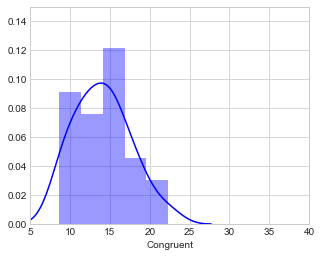

In [31]:
# Build the visualizations here
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
import seaborn as sb
import numpy as np

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

congruent_data = df.Congruent
incongruent_data = df.Incongruent

my_plot = sb.distplot(congruent_data, bins=5, color='blue')

axes = my_plot.axes
axes.set_xlim(5,40)
axes.set_ylim(0,0.15);

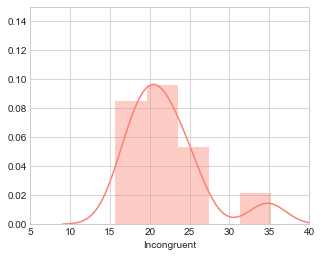

In [32]:
my_plot2 = sb.distplot(incongruent_data, bins=5, color='salmon')
axes = my_plot2.axes
axes.set_xlim(5,40)
axes.set_ylim(0,0.15);

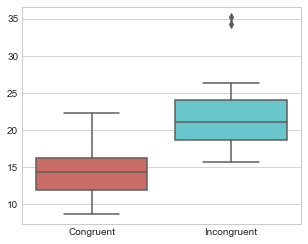

In [27]:
my_plot3 = sb.boxplot(data=df, palette='hls')

### --answer--
As we can see from the plots above, the two datasets have rather different distribution (Shown by Histogram plots). Incongrunet dataset has a median value of around _21_ but the congruent set has a median of approximately _14_ which is apparent in the Box Plots. This shows that on average it took longer for the participants to complete the test in case of the Incongruent condition copared to that of the congruent condition. 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

### --answer--
We deal with the paired t-test here and the relevant Python stats are used. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for instance larger than 0.05, then we retain the null hypothesis of identical average scores.

In this case, we have observed a very small p-value indicating that there is a statistically significant difference between the two sample means, so we reject the null hypothesis of equal averages.

This explains the finding that naming the ink of congruent stimuli is faster than when subjects were tested on naming colors of incompatible words. So, statistically, the Congruent and Incongruent words conditions have an influence on the test results. It is compatible with what we would expect if we did the test.

In [35]:
# Perform the statistical test here
import scipy.stats as stats

statistic,pvalue = stats.ttest_rel(congruent_data, incongruent_data)
print ('pvalue = ', pvalue)

pvalue =  4.103000585711178e-08


(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--